## Simultaneous min/max
Which is the fastest way to get maximum and minimum of an array without calling both `np.min` and `np.max`? 

Do we improve performance by calling only one between `np.max` and `np.min`?

In [1]:
import numpy as np

from plot_machinery.plot import data, kernel, plot, repeat_count

In [2]:
@kernel()
def minmax_maxonce(x, axis=None):
    axis_none = axis is None

    if axis_none:
        x = x.flatten()[None]
        axis = 1

    y = np.max(x[None, :, :] * np.array([-1, 1])[:, None, None], axis=axis + 1)
    y[0] *= -1

    if axis_none:
        return y[:, 0]
    else:
        return y.T


@kernel()
def minmax_both(x, axis=None):
    return np.concatenate(
        [np.min(x, axis=axis)[..., None], np.max(x, axis=axis)[..., None]], axis=axis
    )

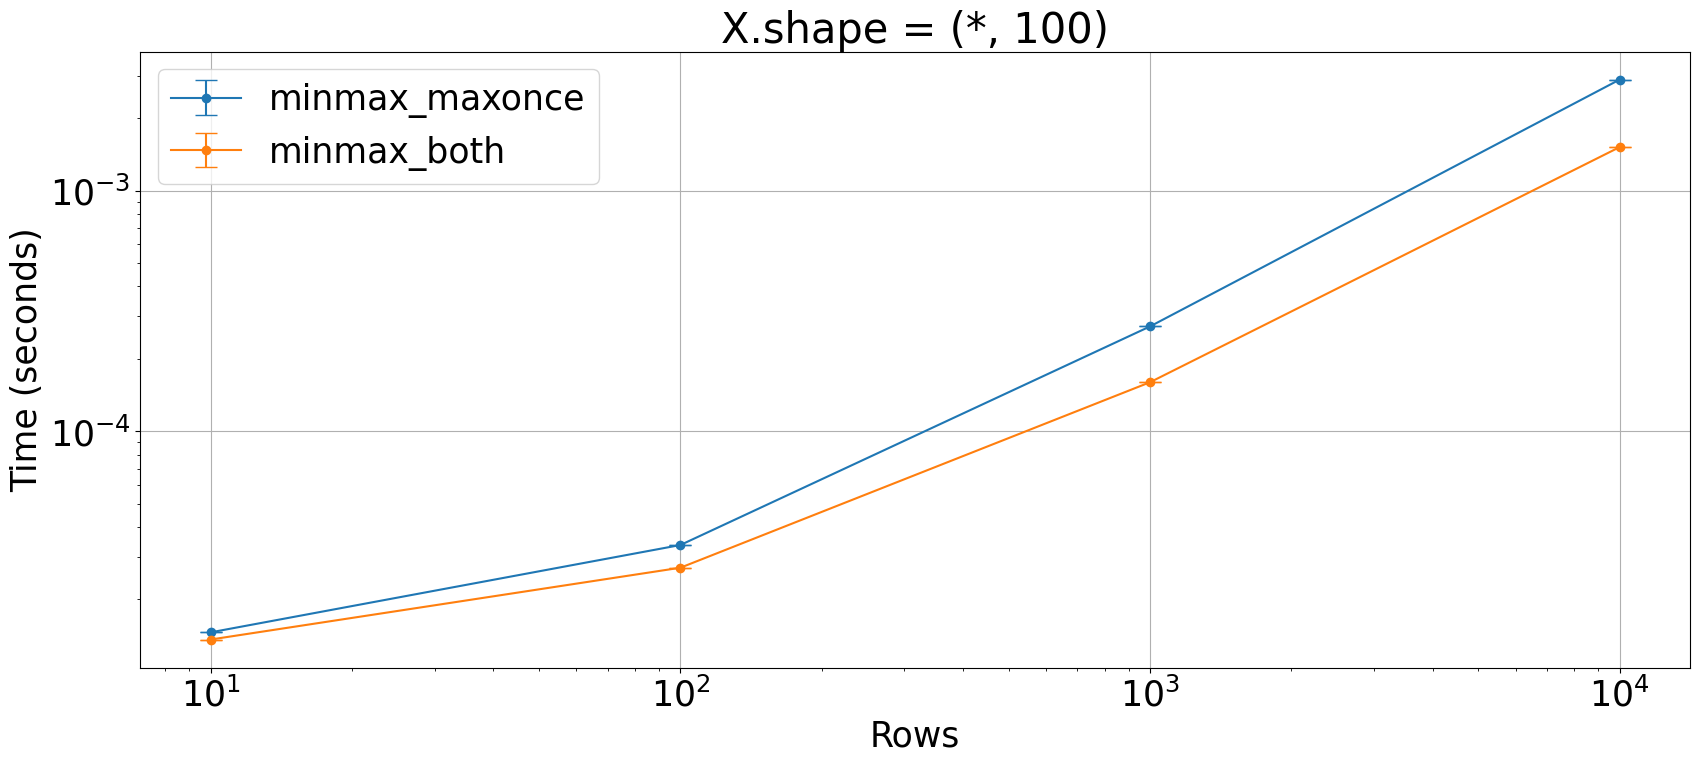

In [3]:
@data(steps=[10, 100, 1000, 10000])
def scale_rows(step):
    return np.arange(step * 100).reshape(step, 100), 1


plot(logx=True, logy=True, xlabel="Rows", title="X.shape = (*, 100)")

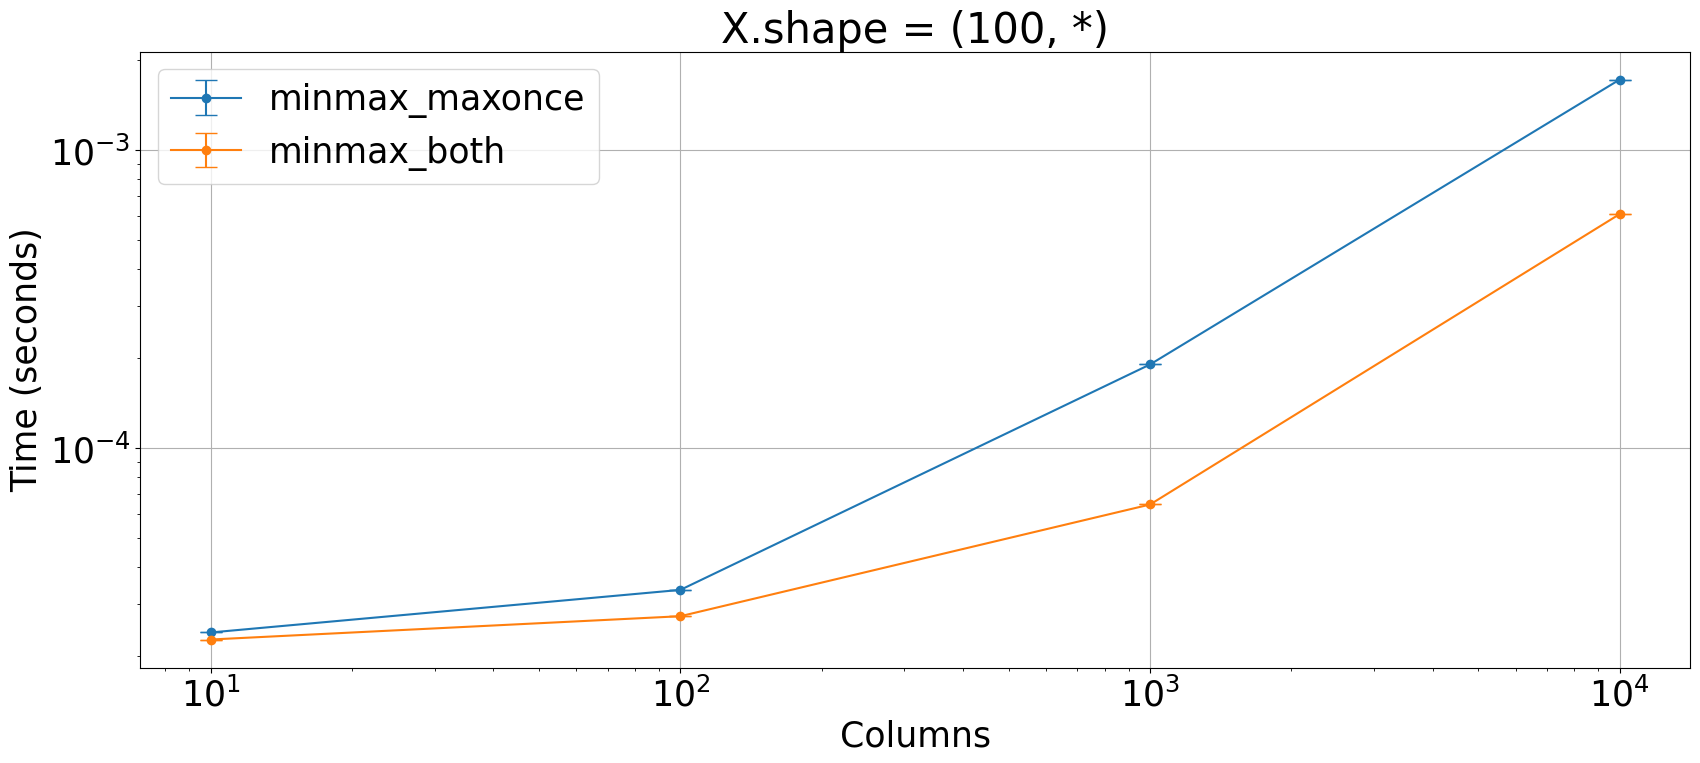

In [4]:
@data(steps=[10, 100, 1000, 10000])
def scale_columns(step):
    return np.arange(step * 100).reshape(100, step), 1


plot(logx=True, logy=True, xlabel="Columns", title="X.shape = (100, *)")

Calling both `np.min` and `np.max` is faster.